# Анализ фильмов с Кинопоиска
__Подготовили:__ Стержанова Виталия, Купцова Александра и Мукимова Алина

## Шаг 1: выбор темы

В качестве темы проекта мы выбрали анализ данных о фильмах с Кинопоиска.

## Шаг 2: cбор данных

Для начала спарсим данные о 4000 фильмах с Кинопоиска.

In [1]:
import requests
import datetime
import json

headers = {"X-API-KEY": "DHV3YYD-S2Z4D9T-P0Y4VDD-YKB776Q"}


def get_movies_for_last_year():
    params = {
        'selectFields': 'name movieLength genres rating type votes year budget fees distributors premiere',
        'type': 'movie',
        'sortField': 'votes.kp',
        'sortType': '-1',
        'limit': 4000
    }
    response = requests.get(
        'https://api.kinopoisk.dev/v1.3/movie',
        headers=headers,
        params=params
    )

    return response.text


movies = get_movies_for_last_year()
movies = movies.replace('\xa0', ' ')

with open('data.txt', 'w', encoding='utf-8') as file:
    file.write(str(json.loads(movies)))
    file.flush()

formatted = json.loads(movies)
print(len(formatted['docs']))
# print(json.dumps(formatted, sort_keys=True, indent=4, ensure_ascii=True))

4000


In [2]:
dict = formatted['docs']
dict

[{'fees': {'world': {'value': 426588510, 'currency': '$'},
   'russia': {'value': 1725813, 'currency': '$'},
   'usa': {'value': 10198820, 'currency': '$'}},
  'rating': {'kp': 8.805,
   'imdb': 8.5,
   'filmCritics': 6.8,
   'russianFilmCritics': 100,
   'await': None},
  'votes': {'kp': 1582052,
   'imdb': 882411,
   'filmCritics': 130,
   'russianFilmCritics': 12,
   'await': 15},
  'movieLength': 112,
  'type': 'movie',
  'name': '1+1',
  'distributors': {'distributor': 'Каскад фильм',
   'distributorRelease': 'Новый Диск'},
  'premiere': {'world': '2011-09-23T00:00:00.000Z',
   'russia': '2012-04-26T00:00:00.000Z'},
  'year': 2011,
  'budget': {'value': 9500000, 'currency': '€'},
  'genres': [{'name': 'драма'}, {'name': 'комедия'}, {'name': 'биография'}]},
 {'fees': {'world': {'value': 115171795, 'currency': '$'},
   'russia': {'value': 18003343, 'currency': '$'},
   'usa': {'value': 36471795, 'currency': '$'}},
  'rating': {'kp': 8.548,
   'imdb': 7.8,
   'filmCritics': 6.5,
   '

Создадим датафрейм с данными:

In [3]:
import pandas as pd
df_l = pd.json_normalize(dict)
df_l

,movieLength,type,name,year,genres,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,...,votes.russianFilmCritics,votes.await,distributors.distributor,distributors.distributorRelease,premiere.world,premiere.russia,budget.value,budget.currency,premiere.digital,premiere.dvd
0,112.0,movie,1+1,2011,"[{'name': 'драма'}, {'name': 'комедия'}, {'nam...",426588510.0,$,1725813.0,$,10198820.0,...,12,15,Каскад фильм,Новый Диск,2011-09-23T00:00:00.000Z,2012-04-26T00:00:00.000Z,9500000.0,€,NaN,NaN
1,113.0,movie,Джентльмены,2019,"[{'name': 'криминал'}, {'name': 'комедия'}, {'...",115171795.0,$,18003343.0,$,36471795.0,...,22,13642,Вольга,None,2019-12-03T00:00:00.000Z,2020-02-13T00:00:00.000Z,22000000.0,$,NaN,NaN
2,180.0,movie,Волк с Уолл-стрит,2013,"[{'name': 'драма'}, {'name': 'криминал'}, {'na...",392000694.0,$,13796916.0,$,116900694.0,...,31,43024,West,West Video,2013-12-09T00:00:00.000Z,2014-02-06T00:00:00.000Z,100000000.0,$,NaN,NaN
3,119.0,movie,Гнев человеческий,2021,"[{'name': 'боевик'}, {'name': 'триллер'}]",103966489.0,$,13318455.0,$,27466489.0,...,37,23492,Вольга,None,2021-04-22T00:00:00.000Z,2021-04-22T00:00:00.000Z,40000000.0,$,NaN,NaN
4,100.0,movie,Брат,1997,"[{'name': 'драма'}, {'name': 'криминал'}, {'na...",1362281.0,$,NaN,NaN,NaN,...,2,0,"Кармен-Премьер, СТВ",Союз-Видео,1997-05-17T00:00:00.000Z,1997-12-12T00:00:00.000Z,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,95.0,movie,Короли лета,2013,"[{'name': 'драма'}, {'name': 'комедия'}, {'nam...",1501595.0,$,4252.0,$,1315590.0,...,1,232,"All Media, Арена",None,2013-01-19T00:00:00.000Z,2013-10-03T00:00:00.000Z,NaN,NaN,NaN,NaN
3996,116.0,movie,Lil Peep: всё для всех,2019,"[{'name': 'документальный'}, {'name': 'музыка'}]",748539.0,$,198254.0,$,547207.0,...,6,262,A-One Films,None,2019-01-10T00:00:00.000Z,2019-11-21T00:00:00.000Z,NaN,NaN,NaN,NaN
3997,85.0,movie,Фантомы,2008,[{'name': 'ужасы'}],48555306.0,$,1811000.0,$,25928550.0,...,1,0,Двадцатый Век Фокс СНГ,Двадцатый Век Фокс СНГ,2008-03-19T00:00:00.000Z,2008-04-03T00:00:00.000Z,8000000.0,$,NaN,NaN
3998,103.0,movie,Выход,2019,"[{'name': 'боевик'}, {'name': 'комедия'}]",79410586.0,$,NaN,NaN,470699.0,...,0,37,None,None,2019-07-31T00:00:00.000Z,NaN,11500000.0,$,NaN,NaN


## Шаг 3: Предварительныя обработка (максимум 10 баллов)

Теперь займемся обработкой данных.

### 1. Поработаем с форматом переменных:
Преобразуем столбец с жанрами в список, чтобы было удобнее работать:

In [4]:
import re
df_l['genres'] = df_l['genres'].apply(lambda x: re.findall(r"'name': '([^']*)'", str(x)))

In [5]:
df_l

,movieLength,type,name,year,genres,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,...,votes.russianFilmCritics,votes.await,distributors.distributor,distributors.distributorRelease,premiere.world,premiere.russia,budget.value,budget.currency,premiere.digital,premiere.dvd
0,112.0,movie,1+1,2011,"[драма, комедия, биография]",426588510.0,$,1725813.0,$,10198820.0,...,12,15,Каскад фильм,Новый Диск,2011-09-23T00:00:00.000Z,2012-04-26T00:00:00.000Z,9500000.0,€,NaN,NaN
1,113.0,movie,Джентльмены,2019,"[криминал, комедия, боевик]",115171795.0,$,18003343.0,$,36471795.0,...,22,13642,Вольга,None,2019-12-03T00:00:00.000Z,2020-02-13T00:00:00.000Z,22000000.0,$,NaN,NaN
2,180.0,movie,Волк с Уолл-стрит,2013,"[драма, криминал, биография, комедия]",392000694.0,$,13796916.0,$,116900694.0,...,31,43024,West,West Video,2013-12-09T00:00:00.000Z,2014-02-06T00:00:00.000Z,100000000.0,$,NaN,NaN
3,119.0,movie,Гнев человеческий,2021,"[боевик, триллер]",103966489.0,$,13318455.0,$,27466489.0,...,37,23492,Вольга,None,2021-04-22T00:00:00.000Z,2021-04-22T00:00:00.000Z,40000000.0,$,NaN,NaN
4,100.0,movie,Брат,1997,"[драма, криминал, боевик]",1362281.0,$,NaN,NaN,NaN,...,2,0,"Кармен-Премьер, СТВ",Союз-Видео,1997-05-17T00:00:00.000Z,1997-12-12T00:00:00.000Z,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,95.0,movie,Короли лета,2013,"[драма, комедия, приключения]",1501595.0,$,4252.0,$,1315590.0,...,1,232,"All Media, Арена",None,2013-01-19T00:00:00.000Z,2013-10-03T00:00:00.000Z,NaN,NaN,NaN,NaN
3996,116.0,movie,Lil Peep: всё для всех,2019,"[документальный, музыка]",748539.0,$,198254.0,$,547207.0,...,6,262,A-One Films,None,2019-01-10T00:00:00.000Z,2019-11-21T00:00:00.000Z,NaN,NaN,NaN,NaN
3997,85.0,movie,Фантомы,2008,[ужасы],48555306.0,$,1811000.0,$,25928550.0,...,1,0,Двадцатый Век Фокс СНГ,Двадцатый Век Фокс СНГ,2008-03-19T00:00:00.000Z,2008-04-03T00:00:00.000Z,8000000.0,$,NaN,NaN
3998,103.0,movie,Выход,2019,"[боевик, комедия]",79410586.0,$,NaN,NaN,470699.0,...,0,37,None,None,2019-07-31T00:00:00.000Z,NaN,11500000.0,$,NaN,NaN


Далее преобразуем столбцы с датами в более удобный формат datetime:

In [6]:
df_l['premiere.world'] = pd.to_datetime(df_l['premiere.world'])
df_l['premiere.russia'] = pd.to_datetime(df_l['premiere.russia'])

In [7]:
df_l

,movieLength,type,name,year,genres,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,...,votes.russianFilmCritics,votes.await,distributors.distributor,distributors.distributorRelease,premiere.world,premiere.russia,budget.value,budget.currency,premiere.digital,premiere.dvd
0,112.0,movie,1+1,2011,"[драма, комедия, биография]",426588510.0,$,1725813.0,$,10198820.0,...,12,15,Каскад фильм,Новый Диск,2011-09-23 00:00:00+00:00,2012-04-26 00:00:00+00:00,9500000.0,€,NaN,NaN
1,113.0,movie,Джентльмены,2019,"[криминал, комедия, боевик]",115171795.0,$,18003343.0,$,36471795.0,...,22,13642,Вольга,None,2019-12-03 00:00:00+00:00,2020-02-13 00:00:00+00:00,22000000.0,$,NaN,NaN
2,180.0,movie,Волк с Уолл-стрит,2013,"[драма, криминал, биография, комедия]",392000694.0,$,13796916.0,$,116900694.0,...,31,43024,West,West Video,2013-12-09 00:00:00+00:00,2014-02-06 00:00:00+00:00,100000000.0,$,NaN,NaN
3,119.0,movie,Гнев человеческий,2021,"[боевик, триллер]",103966489.0,$,13318455.0,$,27466489.0,...,37,23492,Вольга,None,2021-04-22 00:00:00+00:00,2021-04-22 00:00:00+00:00,40000000.0,$,NaN,NaN
4,100.0,movie,Брат,1997,"[драма, криминал, боевик]",1362281.0,$,NaN,NaN,NaN,...,2,0,"Кармен-Премьер, СТВ",Союз-Видео,1997-05-17 00:00:00+00:00,1997-12-12 00:00:00+00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,95.0,movie,Короли лета,2013,"[драма, комедия, приключения]",1501595.0,$,4252.0,$,1315590.0,...,1,232,"All Media, Арена",None,2013-01-19 00:00:00+00:00,2013-10-03 00:00:00+00:00,NaN,NaN,NaN,NaN
3996,116.0,movie,Lil Peep: всё для всех,2019,"[документальный, музыка]",748539.0,$,198254.0,$,547207.0,...,6,262,A-One Films,None,2019-01-10 00:00:00+00:00,2019-11-21 00:00:00+00:00,NaN,NaN,NaN,NaN
3997,85.0,movie,Фантомы,2008,[ужасы],48555306.0,$,1811000.0,$,25928550.0,...,1,0,Двадцатый Век Фокс СНГ,Двадцатый Век Фокс СНГ,2008-03-19 00:00:00+00:00,2008-04-03 00:00:00+00:00,8000000.0,$,NaN,NaN
3998,103.0,movie,Выход,2019,"[боевик, комедия]",79410586.0,$,NaN,NaN,470699.0,...,0,37,None,None,2019-07-31 00:00:00+00:00,NaT,11500000.0,$,NaN,NaN


In [8]:
df_l.dtypes

movieLength                                    float64
type                                            object
name                                            object
year                                             int64
genres                                          object
fees.world.value                               float64
fees.world.currency                             object
fees.russia.value                              float64
fees.russia.currency                            object
fees.usa.value                                 float64
fees.usa.currency                               object
rating.kp                                      float64
rating.imdb                                    float64
rating.filmCritics                             float64
rating.russianFilmCritics                      float64
rating.await                                   float64
votes.kp                                         int64
votes.imdb                                       int64
votes.film

### 2. Теперь обработаем пропуски

In [9]:
df_l.isna().sum()

movieLength                           1
type                                  0
name                                  0
year                                  0
genres                                0
fees.world.value                    421
fees.world.currency                 421
fees.russia.value                  1276
fees.russia.currency               1276
fees.usa.value                     1167
fees.usa.currency                  1167
rating.kp                             0
rating.imdb                           0
rating.filmCritics                    0
rating.russianFilmCritics             0
rating.await                       3999
votes.kp                              0
votes.imdb                            0
votes.filmCritics                     0
votes.russianFilmCritics              0
votes.await                           0
distributors.distributor           1111
distributors.distributorRelease    1512
premiere.world                      145
premiere.russia                     895


In [10]:
df_l[df_l['movieLength'].isnull()]

,movieLength,type,name,year,genres,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,...,votes.russianFilmCritics,votes.await,distributors.distributor,distributors.distributorRelease,premiere.world,premiere.russia,budget.value,budget.currency,premiere.digital,premiere.dvd
3481,NaN,movie,Не игра,2018,[драма],NaN,NaN,NaN,NaN,NaN,...,0,6,None,None,2018-02-16 00:00:00+00:00,NaT,NaN,None,None,None


В MovieLength один пропуск, это фильм "Не игра" -> удаляем строчку

In [11]:
df_l = df_l.drop(df_l[df_l['name'] == 'Не игра'].index)

Довольно много пропусков в колонках premiere.digital, rating.await, premiere.dvd: от 3993 до 3998 (всего 4000 наблюдений). В таком случае удалим их. Также удалим type, так как мы отбирали только фильмы.

In [12]:
df_l['type'].value_counts()

movie    3999
Name: type, dtype: int64

In [13]:
df_l_dropped = df_l.drop(['premiere.digital', 'premiere.dvd', 'rating.await', 'type'], axis=1)

Валюту нужно привести к единому значению -> переводим евро в доллары

Для начала посмотрим, какая валюта вообще есть:

In [14]:
df_l_dropped['fees.world.currency'].value_counts()

$    3579
Name: fees.world.currency, dtype: int64

In [15]:
df_l_dropped['fees.russia.currency'].value_counts()

$    2724
Name: fees.russia.currency, dtype: int64

In [16]:
df_l_dropped['fees.usa.currency'].value_counts()

$    2833
Name: fees.usa.currency, dtype: int64

То есть все сборы в $, здесь переводить ничего не надо. Посмотрим на бюджет:

In [17]:
df_l_dropped['budget.currency'].value_counts()

$      2665
₽       128
€       102
£        26
FRF      11
р.        9
DKK       6
CA$       6
A$        4
DEM       3
NOK       3
HK$       2
SEK       1
₹         1
CN¥       1
₴         1
ATS       1
FIM       1
HUF       1
Name: budget.currency, dtype: int64

Здесь довольно много разных валют, которые встречаются по паре раз. Удалим эти фильмы, а рубли, евро и фунты переведем в $ по текущему курсу:

In [18]:
df_l_dropped.loc[df_l_dropped['budget.currency'] == '€', 'budget.value'] *= 1.09
df_l_dropped.loc[df_l_dropped['budget.currency'] == '₽', 'budget.value'] *= 0.012
df_l_dropped.loc[df_l_dropped['budget.currency'] == '£', 'budget.value'] *= 1.26

In [19]:
df_l_dropped = df_l_dropped[
    (df_l_dropped['budget.currency'] == '€') |
    (df_l_dropped['budget.currency'] == '$') |
    (df_l_dropped['budget.currency'] == '₽') |
    (df_l_dropped['budget.currency'] == '£') |
    (df_l_dropped['budget.currency'].isnull())
]

In [20]:
df_l_dropped['budget.currency'].value_counts()

$    2665
₽     128
€     102
£      26
Name: budget.currency, dtype: int64

In [21]:
df_l_dropped

,movieLength,name,year,genres,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,fees.usa.currency,...,votes.imdb,votes.filmCritics,votes.russianFilmCritics,votes.await,distributors.distributor,distributors.distributorRelease,premiere.world,premiere.russia,budget.value,budget.currency
0,112.0,1+1,2011,"[драма, комедия, биография]",426588510.0,$,1725813.0,$,10198820.0,$,...,882411,130,12,15,Каскад фильм,Новый Диск,2011-09-23 00:00:00+00:00,2012-04-26 00:00:00+00:00,10355000.0,€
1,113.0,Джентльмены,2019,"[криминал, комедия, боевик]",115171795.0,$,18003343.0,$,36471795.0,$,...,361184,277,22,13642,Вольга,None,2019-12-03 00:00:00+00:00,2020-02-13 00:00:00+00:00,22000000.0,$
2,180.0,Волк с Уолл-стрит,2013,"[драма, криминал, биография, комедия]",392000694.0,$,13796916.0,$,116900694.0,$,...,1465395,289,31,43024,West,West Video,2013-12-09 00:00:00+00:00,2014-02-06 00:00:00+00:00,100000000.0,$
3,119.0,Гнев человеческий,2021,"[боевик, триллер]",103966489.0,$,13318455.0,$,27466489.0,$,...,190690,256,37,23492,Вольга,None,2021-04-22 00:00:00+00:00,2021-04-22 00:00:00+00:00,40000000.0,$
4,100.0,Брат,1997,"[драма, криминал, боевик]",1362281.0,$,NaN,NaN,NaN,NaN,...,22847,5,2,0,"Кармен-Премьер, СТВ",Союз-Видео,1997-05-17 00:00:00+00:00,1997-12-12 00:00:00+00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,95.0,Короли лета,2013,"[драма, комедия, приключения]",1501595.0,$,4252.0,$,1315590.0,$,...,82970,123,1,232,"All Media, Арена",None,2013-01-19 00:00:00+00:00,2013-10-03 00:00:00+00:00,NaN,NaN
3996,116.0,Lil Peep: всё для всех,2019,"[документальный, музыка]",748539.0,$,198254.0,$,547207.0,$,...,3755,21,6,262,A-One Films,None,2019-01-10 00:00:00+00:00,2019-11-21 00:00:00+00:00,NaN,NaN
3997,85.0,Фантомы,2008,[ужасы],48555306.0,$,1811000.0,$,25928550.0,$,...,36172,66,1,0,Двадцатый Век Фокс СНГ,Двадцатый Век Фокс СНГ,2008-03-19 00:00:00+00:00,2008-04-03 00:00:00+00:00,8000000.0,$
3998,103.0,Выход,2019,"[боевик, комедия]",79410586.0,$,NaN,NaN,470699.0,$,...,6843,6,0,37,None,None,2019-07-31 00:00:00+00:00,NaT,11500000.0,$


Теперь можем удалить стоблцы с валютой, так как у нас все значения в $ (с пропусками мы еще поработаем ниже):

In [22]:
df_l_dropped = df_l_dropped.drop(['fees.world.currency', 'fees.russia.currency', 'fees.usa.currency', 'budget.currency'], axis=1)
df_l_dropped

,movieLength,name,year,genres,fees.world.value,fees.russia.value,fees.usa.value,rating.kp,rating.imdb,rating.filmCritics,...,votes.kp,votes.imdb,votes.filmCritics,votes.russianFilmCritics,votes.await,distributors.distributor,distributors.distributorRelease,premiere.world,premiere.russia,budget.value
0,112.0,1+1,2011,"[драма, комедия, биография]",426588510.0,1725813.0,10198820.0,8.805,8.5,6.8,...,1582052,882411,130,12,15,Каскад фильм,Новый Диск,2011-09-23 00:00:00+00:00,2012-04-26 00:00:00+00:00,10355000.0
1,113.0,Джентльмены,2019,"[криминал, комедия, боевик]",115171795.0,18003343.0,36471795.0,8.548,7.8,6.5,...,1404260,361184,277,22,13642,Вольга,None,2019-12-03 00:00:00+00:00,2020-02-13 00:00:00+00:00,22000000.0
2,180.0,Волк с Уолл-стрит,2013,"[драма, криминал, биография, комедия]",392000694.0,13796916.0,116900694.0,7.973,8.2,7.8,...,1116549,1465395,289,31,43024,West,West Video,2013-12-09 00:00:00+00:00,2014-02-06 00:00:00+00:00,100000000.0
3,119.0,Гнев человеческий,2021,"[боевик, триллер]",103966489.0,13318455.0,27466489.0,7.590,7.1,6.3,...,1085059,190690,256,37,23492,Вольга,None,2021-04-22 00:00:00+00:00,2021-04-22 00:00:00+00:00,40000000.0
4,100.0,Брат,1997,"[драма, криминал, боевик]",1362281.0,NaN,NaN,8.294,7.8,7.6,...,1058255,22847,5,2,0,"Кармен-Премьер, СТВ",Союз-Видео,1997-05-17 00:00:00+00:00,1997-12-12 00:00:00+00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,95.0,Короли лета,2013,"[драма, комедия, приключения]",1501595.0,4252.0,1315590.0,6.769,7.1,6.9,...,23908,82970,123,1,232,"All Media, Арена",None,2013-01-19 00:00:00+00:00,2013-10-03 00:00:00+00:00,NaN
3996,116.0,Lil Peep: всё для всех,2019,"[документальный, музыка]",748539.0,198254.0,547207.0,7.877,7.5,7.4,...,23904,3755,21,6,262,A-One Films,None,2019-01-10 00:00:00+00:00,2019-11-21 00:00:00+00:00,NaN
3997,85.0,Фантомы,2008,[ужасы],48555306.0,1811000.0,25928550.0,6.194,5.2,3.5,...,23882,36172,66,1,0,Двадцатый Век Фокс СНГ,Двадцатый Век Фокс СНГ,2008-03-19 00:00:00+00:00,2008-04-03 00:00:00+00:00,8000000.0
3998,103.0,Выход,2019,"[боевик, комедия]",79410586.0,NaN,470699.0,7.354,7.0,6.0,...,23881,6843,6,0,37,None,None,2019-07-31 00:00:00+00:00,NaT,11500000.0


Заполним пропуски в столбцах со сборами и бюджетом средними значениями:

In [23]:
mfees_value_world = round(df_l_dropped['fees.world.value'].mean()) # Вычисление среднего значения столбца "fees.world.value" для отфильтрованных строк
mfees_value_world

125275568

In [24]:
mfees_value_russia = round(df_l_dropped['fees.russia.value'].mean())
mfees_value_russia

4345349

In [25]:
mfees_value_usa = round(df_l_dropped['fees.usa.value'].mean())
mfees_value_usa

65760649

In [26]:
mbudget_value = round(df_l_dropped['budget.value'].mean())
mbudget_value

45809569

In [27]:
# Замена пропущенных значений
df_l_dropped['fees.world.value'] = df_l_dropped['fees.world.value'].fillna(mfees_value_world)
df_l_dropped['fees.russia.value'] = df_l_dropped['fees.russia.value'].fillna(mfees_value_russia)
df_l_dropped['fees.usa.value'] = df_l_dropped['fees.usa.value'].fillna(mfees_value_usa)
df_l_dropped['budget.value'] = df_l_dropped['budget.value'].fillna(mbudget_value)

In [28]:
df_l_dropped.isna().sum()

movieLength                           0
name                                  0
year                                  0
genres                                0
fees.world.value                      0
fees.russia.value                     0
fees.usa.value                        0
rating.kp                             0
rating.imdb                           0
rating.filmCritics                    0
rating.russianFilmCritics             0
votes.kp                              0
votes.imdb                            0
votes.filmCritics                     0
votes.russianFilmCritics              0
votes.await                           0
distributors.distributor           1089
distributors.distributorRelease    1495
premiere.world                      145
premiere.russia                     875
budget.value                          0
dtype: int64

In [29]:
df_l_dropped['budget.value'].head(10)

0     10355000.0
1     22000000.0
2    100000000.0
3     40000000.0
4     45809569.0
5     18000000.0
6    237000000.0
7     25000000.0
8    160000000.0
9     60000000.0
Name: budget.value, dtype: float64

Заполняем пропуски дистрибьютеров на "other", а столбец distributors.distributorRelease удалим, так как он не понадобиться для дальнейшего анализа.

In [30]:
df_l_dropped['distributors.distributor'] = df_l_dropped['distributors.distributor'].fillna('other')
df_l_dropped.drop('distributors.distributorRelease', axis=1, inplace=True)

Поработаем с колонками премьер (premiere.world и premiere.russia):

Проверим, как много фильмов с известной датой премьеры в России, но неизвестной в мировом прокате:

In [31]:
(df_l_dropped['premiere.russia'].isnull() & df_l_dropped['premiere.world'].notnull()).sum()

853

Посмотрим, как много фильмов с известной датой премьеры в мировом прокате, но неизвестной в России:

In [32]:
(df_l_dropped['premiere.world'].isnull() & df_l_dropped['premiere.russia'].notnull()).sum()

123

Наконец, проверим, как много фильмов с неизвестной датов премьеры в мире и в РФ:

In [33]:
(df_l_dropped['premiere.world'].isnull() & df_l_dropped['premiere.russia'].isnull()).sum()

22

Таким образом, лучше всего будет заполнить пропуски в даты примьеры в РФ соотвествующими датами в мировом прокате, и наоброт. Остальные 22 фильма лучше удалить, потому что если их заполнить, к примеру, модой, то это может исказить дальнейший анализ.

In [34]:
df_l_dropped.loc[df_l_dropped['premiere.world'].isnull() & df_l_dropped['premiere.russia'].notnull(), 'premiere.world'] = df_l_dropped['premiere.russia']
df_l_dropped.loc[df_l_dropped['premiere.russia'].isnull() & df_l_dropped['premiere.world'].notnull(), 'premiere.russia'] = df_l_dropped['premiere.world']

In [35]:
df_l_dropped.dropna(subset=['premiere.world'], inplace=True)

In [36]:
df_l_dropped.isna().sum()

movieLength                  0
name                         0
year                         0
genres                       0
fees.world.value             0
fees.russia.value            0
fees.usa.value               0
rating.kp                    0
rating.imdb                  0
rating.filmCritics           0
rating.russianFilmCritics    0
votes.kp                     0
votes.imdb                   0
votes.filmCritics            0
votes.russianFilmCritics     0
votes.await                  0
distributors.distributor     0
premiere.world               0
premiere.russia              0
budget.value                 0
dtype: int64

Пропусков больше нет, летим дальше!

In [37]:
df_final = df_l_dropped

### 3. Опишем данные

In [38]:
df_final

,movieLength,name,year,genres,fees.world.value,fees.russia.value,fees.usa.value,rating.kp,rating.imdb,rating.filmCritics,rating.russianFilmCritics,votes.kp,votes.imdb,votes.filmCritics,votes.russianFilmCritics,votes.await,distributors.distributor,premiere.world,premiere.russia,budget.value
0,112.0,1+1,2011,"[драма, комедия, биография]",426588510.0,1725813.0,10198820.0,8.805,8.5,6.8,100.0000,1582052,882411,130,12,15,Каскад фильм,2011-09-23 00:00:00+00:00,2012-04-26 00:00:00+00:00,10355000.0
1,113.0,Джентльмены,2019,"[криминал, комедия, боевик]",115171795.0,18003343.0,36471795.0,8.548,7.8,6.5,86.3636,1404260,361184,277,22,13642,Вольга,2019-12-03 00:00:00+00:00,2020-02-13 00:00:00+00:00,22000000.0
2,180.0,Волк с Уолл-стрит,2013,"[драма, криминал, биография, комедия]",392000694.0,13796916.0,116900694.0,7.973,8.2,7.8,77.4194,1116549,1465395,289,31,43024,West,2013-12-09 00:00:00+00:00,2014-02-06 00:00:00+00:00,100000000.0
3,119.0,Гнев человеческий,2021,"[боевик, триллер]",103966489.0,13318455.0,27466489.0,7.590,7.1,6.3,72.9730,1085059,190690,256,37,23492,Вольга,2021-04-22 00:00:00+00:00,2021-04-22 00:00:00+00:00,40000000.0
4,100.0,Брат,1997,"[драма, криминал, боевик]",1362281.0,4345349.0,65760649.0,8.294,7.8,7.6,0.0000,1058255,22847,5,2,0,"Кармен-Премьер, СТВ",1997-05-17 00:00:00+00:00,1997-12-12 00:00:00+00:00,45809569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,95.0,Короли лета,2013,"[драма, комедия, приключения]",1501595.0,4252.0,1315590.0,6.769,7.1,6.9,0.0000,23908,82970,123,1,232,"All Media, Арена",2013-01-19 00:00:00+00:00,2013-10-03 00:00:00+00:00,45809569.0
3996,116.0,Lil Peep: всё для всех,2019,"[документальный, музыка]",748539.0,198254.0,547207.0,7.877,7.5,7.4,66.6667,23904,3755,21,6,262,A-One Films,2019-01-10 00:00:00+00:00,2019-11-21 00:00:00+00:00,45809569.0
3997,85.0,Фантомы,2008,[ужасы],48555306.0,1811000.0,25928550.0,6.194,5.2,3.5,0.0000,23882,36172,66,1,0,Двадцатый Век Фокс СНГ,2008-03-19 00:00:00+00:00,2008-04-03 00:00:00+00:00,8000000.0
3998,103.0,Выход,2019,"[боевик, комедия]",79410586.0,4345349.0,470699.0,7.354,7.0,6.0,0.0000,23881,6843,6,0,37,other,2019-07-31 00:00:00+00:00,2019-07-31 00:00:00+00:00,11500000.0


In [39]:
df_final.dtypes

movieLength                              float64
name                                      object
year                                       int64
genres                                    object
fees.world.value                         float64
fees.russia.value                        float64
fees.usa.value                           float64
rating.kp                                float64
rating.imdb                              float64
rating.filmCritics                       float64
rating.russianFilmCritics                float64
votes.kp                                   int64
votes.imdb                                 int64
votes.filmCritics                          int64
votes.russianFilmCritics                   int64
votes.await                                int64
distributors.distributor                  object
premiere.world               datetime64[ns, UTC]
premiere.russia              datetime64[ns, UTC]
budget.value                             float64
dtype: object

Опишем содержание каждой переменной:
1. movieLength — длина фильма в минутах
2. name — название фильма
3. year — год выпуска фильма
4. genres — жанры фильма
5. fees.world.value — сколько собрал фильм в мировом прокате
6. fees.russia.value — сколько собрал фильм в РФ
7. fees.usa.value — сколько собрал фильм в США
8. rating.kp — рейтинг фильма на Кинопоиске
9. rating.imdb — рейтинг фильма на IMDB
10. rating.filmCritics — рейтинг фильма у кинокритиков
11. rating.russianFilmCritics — рейтинг фильма у кинокритиков в РФ
12. votes.kp — количество голосов (оценок) на Кинопоиске
13. votes.imdb — количество голосов (оценок) на IMDB
14. votes.filmCritics — количество голосов кинокритиков
15. votes.russianFilmCritics — количество голосов кинокритиков из РФ
16. votes.await — количество пользователей, которые ожидали выхода фильма 
17. distributors.distributor — дистрибьютор (или прокатчик) фильма в РФ
18. premiere.world — дата мировой премьеры
19. premiere.russia — дата премьеры в РФ
20. budget.value — бюджет фильма

## Шаг 4. Визуализация (максимум 20 баллов)

In [40]:
import matplotlib.pyplot as plt

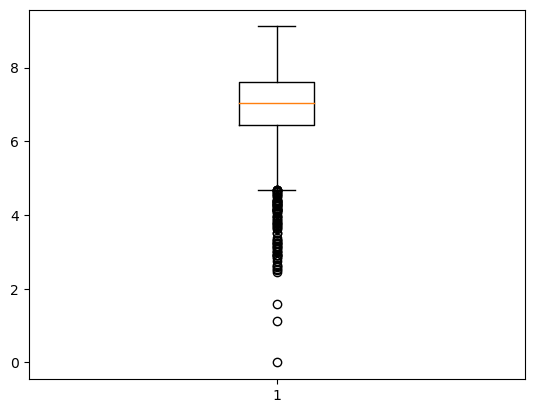

In [41]:
plt.boxplot(df_final['rating.kp'])
plt.show()

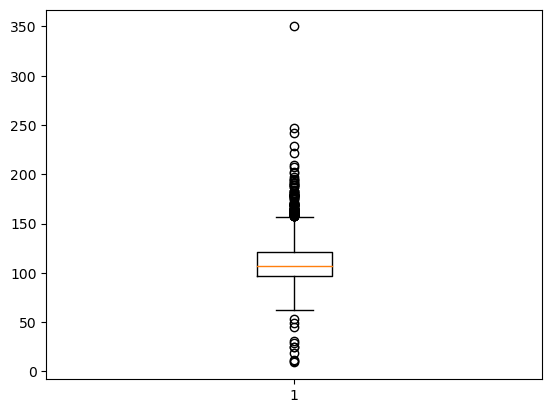

In [42]:
plt.boxplot(df_final['movieLength'])
plt.show()

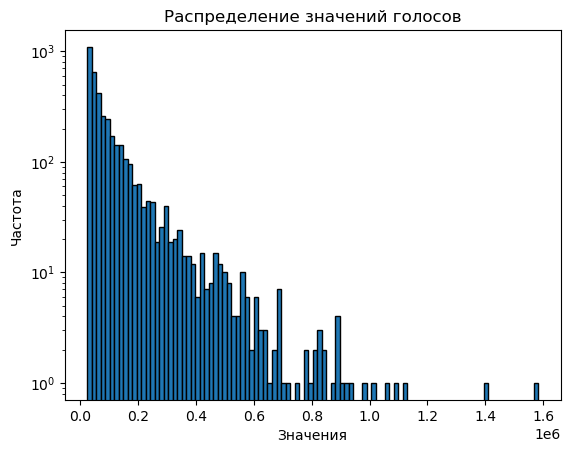

In [43]:
plt.hist(df_final['votes.kp'], bins=100, edgecolor='black', log=True)


plt.title('Распределение значений голосов')
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.show()

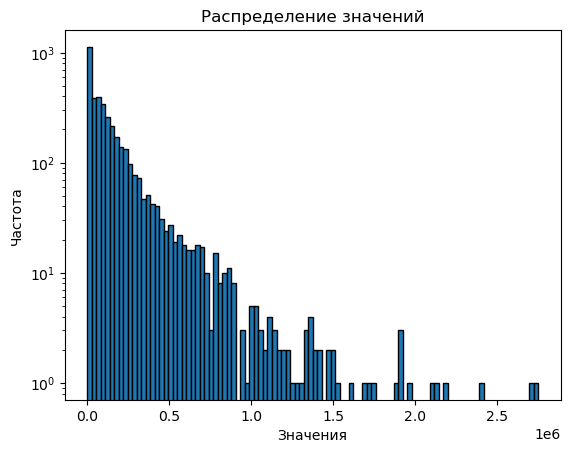

In [44]:
plt.hist(df_final['votes.imdb'], bins=100, edgecolor='black', log=True)


plt.title('Распределение значений')
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.show()

## Шаг 6. Гипотезы (максимум 20 баллов)

Основная цель нашего проекта - научиться предсказывать кассовые сборы фильмов. На этапе визуализации, мы заметили, что на показатель сборов фильма/сериалы влияют такие метрики, как:

- Период шоков
- Дата выхода (выходной не выходной)
- Длительность фильма
- Бюджет фильма

Начнем тестирование гипотез, которые сформулируем точнее далее. Сейчас необходимо добавить переменные, которые перевидут категориальные признаки в бинарный вид

In [45]:
# Посмотрим на года, по которым у нас есть данные
unique_values = df_final['premiere.world'].unique()
years = [value.year for value in unique_values]
unique_years = sorted(set(years))
print(unique_years)

[1921, 1925, 1931, 1936, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1950, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


У нас есть данные с 1921 года, однако логичнее ориентироваться на шоки, в период после 2000 года, ввиду ряда причин:
1. Активное развитие киноиндустрии
2. Инфляция (фильмы в 20 веке собирали меньше, по причинам экономической ситуации в мире - другие средние показатели по инфляции, потреблению, общему благосостоянию населения и тд)

In [59]:
# Добавили колонку "Total fees", для удобства
df_final['Total fees'] = df_final[['fees.world.value', 'fees.russia.value', 'fees.usa.value']].sum(axis=1)
df_final

,movieLength,name,year,genres,fees.world.value,fees.russia.value,fees.usa.value,rating.kp,rating.imdb,rating.filmCritics,...,votes.filmCritics,votes.russianFilmCritics,votes.await,distributors.distributor,premiere.world,premiere.russia,budget.value,Year,Total fees,Crisis
0,112.0,1+1,2011,"[драма, комедия, биография]",426588510.0,1725813.0,10198820.0,8.805,8.5,6.8,...,130,12,15,Каскад фильм,2011-09-23 00:00:00+00:00,2012-04-26 00:00:00+00:00,10355000.0,2011,438513143.0,0
1,113.0,Джентльмены,2019,"[криминал, комедия, боевик]",115171795.0,18003343.0,36471795.0,8.548,7.8,6.5,...,277,22,13642,Вольга,2019-12-03 00:00:00+00:00,2020-02-13 00:00:00+00:00,22000000.0,2019,169646933.0,0
2,180.0,Волк с Уолл-стрит,2013,"[драма, криминал, биография, комедия]",392000694.0,13796916.0,116900694.0,7.973,8.2,7.8,...,289,31,43024,West,2013-12-09 00:00:00+00:00,2014-02-06 00:00:00+00:00,100000000.0,2013,522698304.0,0
3,119.0,Гнев человеческий,2021,"[боевик, триллер]",103966489.0,13318455.0,27466489.0,7.590,7.1,6.3,...,256,37,23492,Вольга,2021-04-22 00:00:00+00:00,2021-04-22 00:00:00+00:00,40000000.0,2021,144751433.0,1
4,100.0,Брат,1997,"[драма, криминал, боевик]",1362281.0,4345349.0,65760649.0,8.294,7.8,7.6,...,5,2,0,"Кармен-Премьер, СТВ",1997-05-17 00:00:00+00:00,1997-12-12 00:00:00+00:00,45809569.0,1997,71468279.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,95.0,Короли лета,2013,"[драма, комедия, приключения]",1501595.0,4252.0,1315590.0,6.769,7.1,6.9,...,123,1,232,"All Media, Арена",2013-01-19 00:00:00+00:00,2013-10-03 00:00:00+00:00,45809569.0,2013,2821437.0,0
3996,116.0,Lil Peep: всё для всех,2019,"[документальный, музыка]",748539.0,198254.0,547207.0,7.877,7.5,7.4,...,21,6,262,A-One Films,2019-01-10 00:00:00+00:00,2019-11-21 00:00:00+00:00,45809569.0,2019,1494000.0,0
3997,85.0,Фантомы,2008,[ужасы],48555306.0,1811000.0,25928550.0,6.194,5.2,3.5,...,66,1,0,Двадцатый Век Фокс СНГ,2008-03-19 00:00:00+00:00,2008-04-03 00:00:00+00:00,8000000.0,2008,76294856.0,1
3998,103.0,Выход,2019,"[боевик, комедия]",79410586.0,4345349.0,470699.0,7.354,7.0,6.0,...,6,0,37,other,2019-07-31 00:00:00+00:00,2019-07-31 00:00:00+00:00,11500000.0,2019,84226634.0,0


In [65]:
pip install -- holidays

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.3/541.3 kB 2.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [68]:
import holidays

# Создание экземпляра объекта с праздничными днями
holidays_set = holidays.RU() + holidays.US(observed=True)

# Функция для проверки, является ли день праздничным или выходным
def is_holiday(date):
    return date.date() in holidays_set or date.weekday() >= 5

# Добавление колонки "Holiday" в датафрейм
df_final['Holiday'] = df_final['premiere.world'].apply(lambda x: 1 if is_holiday(x) else 0)

### Работа с гипотезой о шоках

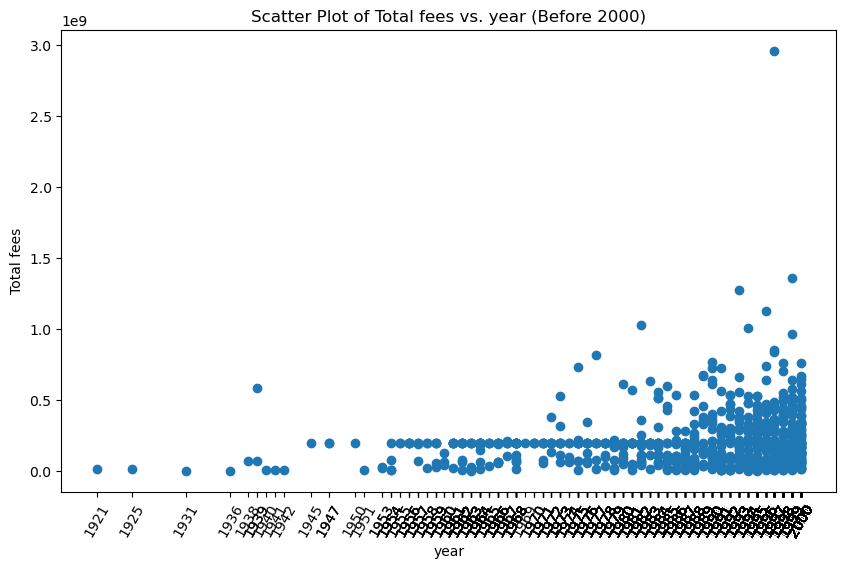

In [60]:
df_filtered = df_final[df_final['year'] <= 2000]

fig = plt.figure(figsize=(10, 6), dpi=100)
ax = fig.add_subplot(111)

plt.scatter(df_filtered['year'], df_filtered['Total fees'])
plt.xlabel('year')
plt.ylabel('Total fees')
plt.title('Scatter Plot of Total fees vs. year (Before 2000)')

plt.xticks(df_filtered['year'], rotation=60)
plt.show()

Довольно много выбросов и нерепрезентатиыных данных, поэтому берем от 1987 года

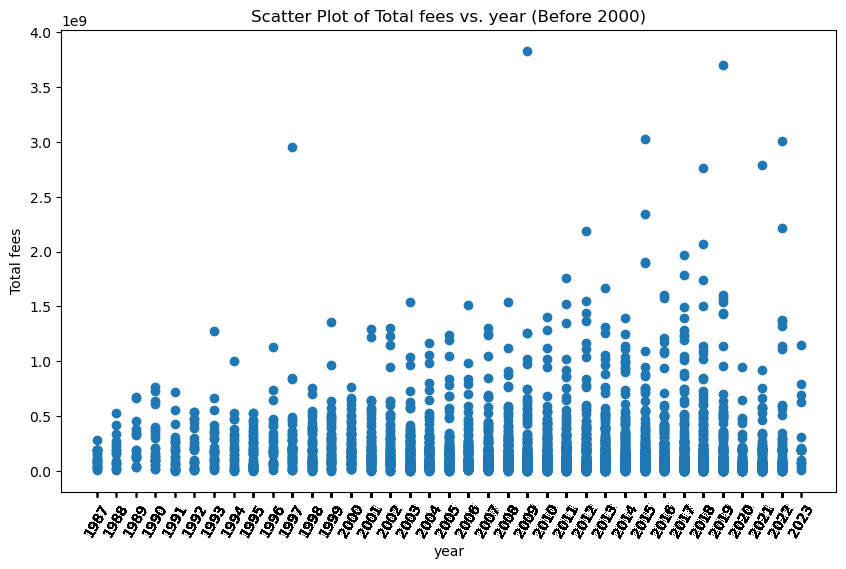

In [61]:
df_filtered = df_final[df_final['year'] >= 1987]

fig = plt.figure(figsize=(10, 6), dpi=100)
ax = fig.add_subplot(111)

plt.scatter(df_filtered['year'], df_filtered['Total fees'])
plt.xlabel('year')
plt.ylabel('Total fees')
plt.title('Scatter Plot of Total fees vs. year (Before 2000)')

plt.xticks(df_filtered['year'], rotation=60)
plt.show()

Исходя из диаграммы рассеяния, выделяем года, в которые был кризис (шоки различного характера):
- Последствия кризиса 2000-2001 года
- Обострение геополитики (Грузия, санкции, Южная Корея): 2006 год
- Мировой кризис 2008 года
- Пандемия: 2020 год
- Геополитика: 2022-2023 года

In [62]:
# Добавим новую переменную: был кризис - 1, не было кризиса - 0
df_final['Crisis'] = df_final['year'].apply(lambda x: 1 if x in [2000, 2001, 2006, 2008, 2020, 2022, 2021] else 0)

Мы заметили, что в периоды кризисов, кассовые сборы были ниже
- Гипотеза H0: мировой шок (кризис) снижает кассове сборы
- Гипотеза H1: мировой шок (кризис) не снижает кассовые сборы

In [63]:
from scipy.stats import ttest_ind
df_two = df_final[df_final['year'] >= 1987]
# Создали две выборки на основе значения столбца 'Crisis': значение 'Crisis' равно 1, значение 'Crisis' равно 0
crisis_films = df_two[df_two['Crisis'] == 1]['Total fees']
non_crisis_films = df_two[df_two['Crisis'] == 0]['Total fees']

# Проведение t-теста
t_statistic, p_value = ttest_ind(crisis_films, non_crisis_films)

# Вывод результатов
print("t-статистика:", round(t_statistic, 3))
print("p-value:", round(p_value, 3))

t-статистика: -2.378
p-value: 0.017


- Полученное p-value = 0.017 достаточно маленькое, что говорит о том, что различия в кассовых сборах между кризисными и некризисными фильмами статистически значимы. 
- Также отрицательное значение t-статистики = -2.38 указывает на то, что кассовые сборы в периоды кризиса склонны быть ниже, чем вне кризисных периодов.

### Работа с гипотезой о дате выхода

Мы заметили, что когда у фильма был релиз в выходной день, то кассовые сборы были выше
- Гипотеза H0: релиз в выходной день повышает кассовый сбор
- Гипотеза H1: релиз в выходной день повышает кассовый сбор

In [71]:
import scipy.stats as stats
# Разделение данных на две группы по значению колонки "Holiday"
group1 = df_final[df_final['Holiday'] == 1]['Total fees']
group2 = df_final[df_final['Holiday'] == 0]['Total fees']

# Проверка гипотезы с использованием t-теста Стьюдента
t_statistic, p_value = stats.ttest_ind(group1, group2)

print("t-статистика:", t_statistic)
print("p-value:", p_value)

t-статистика: -1.6824817771201654
p-value: 0.09255501474761155


- Значение t-статистики отрицательное, что указывает на то, что средние значения кассовых сборов в группе фильмов, вышедших в выходные дни, могут быть ниже средних значений в группе фильмов, вышедших в рабочие дни.
- p-value = 0.92, значит нет основания отвергать гипотезу H0 на уровне значимости 

## Шаг 7. Машинное обучение (максимум 20 баллов)
Скорее всего, в ваших данных есть какая-то переменная, которую есть смысл попробовать предсказать. Подробно объясните, что именно вы собираетесь предсказывать и зачем. Какую задачу вы решаете? Какую метрику вы будете использовать для того, чтобы измерить качество вашей модели?

Аккуратно разбейте выборку на обучающую и тестовую, сделайте всю необходимую предобработку данных и обучите несколько моделей. Подберите для них все необходимые гиперпараметры. Проанализируйте получившиеся результаты и сделайте выводы.

In [47]:
df_final

,movieLength,name,year,genres,fees.world.value,fees.russia.value,fees.usa.value,rating.kp,rating.imdb,rating.filmCritics,rating.russianFilmCritics,votes.kp,votes.imdb,votes.filmCritics,votes.russianFilmCritics,votes.await,distributors.distributor,premiere.world,premiere.russia,budget.value
0,112.0,1+1,2011,"[драма, комедия, биография]",426588510.0,1725813.0,10198820.0,8.805,8.5,6.8,100.0000,1582052,882411,130,12,15,Каскад фильм,2011-09-23 00:00:00+00:00,2012-04-26 00:00:00+00:00,10355000.0
1,113.0,Джентльмены,2019,"[криминал, комедия, боевик]",115171795.0,18003343.0,36471795.0,8.548,7.8,6.5,86.3636,1404260,361184,277,22,13642,Вольга,2019-12-03 00:00:00+00:00,2020-02-13 00:00:00+00:00,22000000.0
2,180.0,Волк с Уолл-стрит,2013,"[драма, криминал, биография, комедия]",392000694.0,13796916.0,116900694.0,7.973,8.2,7.8,77.4194,1116549,1465395,289,31,43024,West,2013-12-09 00:00:00+00:00,2014-02-06 00:00:00+00:00,100000000.0
3,119.0,Гнев человеческий,2021,"[боевик, триллер]",103966489.0,13318455.0,27466489.0,7.590,7.1,6.3,72.9730,1085059,190690,256,37,23492,Вольга,2021-04-22 00:00:00+00:00,2021-04-22 00:00:00+00:00,40000000.0
4,100.0,Брат,1997,"[драма, криминал, боевик]",1362281.0,4345349.0,65760649.0,8.294,7.8,7.6,0.0000,1058255,22847,5,2,0,"Кармен-Премьер, СТВ",1997-05-17 00:00:00+00:00,1997-12-12 00:00:00+00:00,45809569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,95.0,Короли лета,2013,"[драма, комедия, приключения]",1501595.0,4252.0,1315590.0,6.769,7.1,6.9,0.0000,23908,82970,123,1,232,"All Media, Арена",2013-01-19 00:00:00+00:00,2013-10-03 00:00:00+00:00,45809569.0
3996,116.0,Lil Peep: всё для всех,2019,"[документальный, музыка]",748539.0,198254.0,547207.0,7.877,7.5,7.4,66.6667,23904,3755,21,6,262,A-One Films,2019-01-10 00:00:00+00:00,2019-11-21 00:00:00+00:00,45809569.0
3997,85.0,Фантомы,2008,[ужасы],48555306.0,1811000.0,25928550.0,6.194,5.2,3.5,0.0000,23882,36172,66,1,0,Двадцатый Век Фокс СНГ,2008-03-19 00:00:00+00:00,2008-04-03 00:00:00+00:00,8000000.0
3998,103.0,Выход,2019,"[боевик, комедия]",79410586.0,4345349.0,470699.0,7.354,7.0,6.0,0.0000,23881,6843,6,0,37,other,2019-07-31 00:00:00+00:00,2019-07-31 00:00:00+00:00,11500000.0
